## **Semantic SEO Audit from scratch in R**

This notebook works only with Dataiku platform : https://www.dataiku.com/

To do it, I use two managed folders :
- path_in to store all files generated by Yooda Insight: https://insight.yooda.com/
- path_out to store all results generated by this Notebook

Follow this doc to create and use managed folders : https://doc.dataiku.com/dss/latest/advanced/managed_folders.html

In [1]:
library(dataiku)

You need to install these packages

In [23]:
#Use evenn
packages <- c("eVenn", "dplyr","stringr","text2vec", "glmnet", "ggplot2", "tm")
if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
  install.packages(setdiff(packages, rownames(installed.packages())))  
}

Copy / paste all your CSV files generated by Yooda Insight in your Dataiku Folder path.

In [19]:
current.folder <- getwd()
path_in <- dkuManagedFolderPath("yooda")
path_in

path_out <- dkuManagedFolderPath("semanticSEOaudit")
path_out

dateYooda <- "2017-05-10"


[1] "/home/dataiku/dss/managed_folders/PREDICTRANKINGS/LNGq43Ve"

[1] "/home/dataiku/dss/managed_folders/PREDICTRANKINGS/8jJaLIT2"

# eVenn Package 

- Group all CSV files in one dataset, I create "addlist" function to do it.
- Use eVenn package : http://blog.mrbioinfo.com

In [9]:
library(dplyr)
all.the.files <- list.files(path_in,full=TRUE)
# display 2 first files
head(all.the.files,2)

# use regex
dateYooda <- "2017-05-10"
regex <- paste(".*/SeoBenchmark - | - ",dateYooda,".*",sep="") 

# prepare names for good visualization
name_files <- gsub(regex, "", all.the.files)
name_files

[1] "/home/dataiku/dss/managed_folders/PREDICTRANKINGS/LNGq43Ve/SeoBenchmark - abcroisiere.com - 2017-05-10 - Expressions de recherche.csv"    
[2] "/home/dataiku/dss/managed_folders/PREDICTRANKINGS/LNGq43Ve/SeoBenchmark - azur-croisieres.com - 2017-05-10 - Expressions de recherche.csv"

[1] "abcroisiere.com"                 "azur-croisieres.com"            
 [3] "costacroisieres.fr"              "croisiere.promovacances.com"    
 [5] "croisierenet.com"                "croisieres.fr"                  
 [7] "msc-croisieres.croisierenet.com" "msc.abcroisiere.com"            
 [9] "msccroisieres.fr"                "planete-croisiere.com"          
[11] "promocroisiere.com"

In [21]:
library(stringr)

website <- 'croisiere'

path_website <- paste(path_in,'/',sep="")
#ur#l_path <- path_in

addList <- function(x){
  DF <- read.csv(x, header=TRUE, sep = ";", encoding="UTF-8", stringsAsFactors=FALSE)
  DF <- select(DF,c(1))
  colnames(DF) <- c('Keyword')
  DF <- unique(DF)
  rownames(DF) <- DF$Keyword
  return(DF)
}

# combine all csv
all.the.files <- list.files(path_in,full=TRUE)
regex <- paste(".*/SeoBenchmark - | - ",dateYooda,".*",sep="") 
name_files <- gsub(regex, "", all.the.files)

system.time({
all.the.data <- lapply( all.the.files,  addList)
})

# add website names for each list
names(all.the.data) <- c(name_files)


   user  system elapsed 
  0.506   0.003   0.509 

Use eVenn package to compute a matrix comparison of lists (from 2 to infinite) and plot the results in a Venn diagram if (N<=4). It is possible to produce a complete annotated file, merging the annotations of the compared lists.

In [22]:
# Step 1 : Generate Venn Matrix

library(eVenn)
library(dplyr)

# generate eVenn in working directory
dir.create(file.path(getwd(), "eVenn"), showWarnings = TRUE)

# use param CompName
system.time({
evenn(pathRes="./eVenn/",matLists=all.the.data, annot=FALSE, VennBar=FALSE, display=FALSE, overlaps=FALSE, CompName=website)
})

   user  system elapsed 
  3.245   0.009   3.256 

In [23]:
list.files(paste(getwd(),"/eVenn/Venn_",website,sep=""),full=TRUE)

[1] "/home/dataiku/dss/jupyter-run/dku-workdirs/PREDICTRANKINGS/Semantic_Analysis_for_SEO05502cca/eVenn/Venn_croisiere/NutShellTable.txt"
[2] "/home/dataiku/dss/jupyter-run/dku-workdirs/PREDICTRANKINGS/Semantic_Analysis_for_SEO05502cca/eVenn/Venn_croisiere/VennMatrixBin.txt"

We are going to search where my website is not present for specific keywords where four competitors are presents.

In [24]:
require("doBy")
require("dplyr")
require("stringr")

# Step 2 : choosee potential keywords : my website is not present in SERP but 4 competitors are 
# Choose the best rule for you
fichierVenn <- paste("./eVenn/Venn_",website,"/VennMatrixBin.txt",sep="")

DF <- read.csv(fichierVenn, sep = "\t", encoding="CP1252", stringsAsFactors=FALSE)

colnames(DF)[1] <- "Keywords"

DF <- arrange(DF, -Total_lists)


DF_PotentialKeywords <- subset(DF, DF$Total_lists >= 4 & DF$planete.croisiere.com==0 )
DF_PotentialKeywords <- data.frame(lapply(DF_PotentialKeywords, as.character), stringsAsFactors=FALSE)

# print first results
head(DF_PotentialKeywords,10)

#dir.create(file.path("./site"), showWarnings = FALSE)
#dir.create(file.path("./site/", website), showWarnings = FALSE)

write.csv2(DF_PotentialKeywords, paste(path_out,"/keywords_potential.csv",sep=""))


Loading required package: doBy


Keywords,abcroisiere.com,azur.croisieres.com,costacroisieres.fr,croisiere.promovacances.com,croisierenet.com,croisieres.fr,msc.croisieres.croisierenet.com,msc.abcroisiere.com,msccroisieres.fr,planete.croisiere.com,promocroisiere.com,Total_lists
croisière,1,1,1,1,1,1,0,0,1,0,1,8
croisiere,1,1,1,1,1,1,0,0,1,0,1,8
croisier,1,1,1,1,1,1,0,0,1,0,1,8
msc croisières france,1,1,0,0,0,1,1,1,1,0,1,7
msc croisiere 2016,1,1,0,0,0,1,1,1,1,0,1,7
les croisieres msc,1,1,0,0,0,1,1,1,1,0,1,7
msc croisieres pas cher,1,0,0,1,1,0,1,1,1,0,1,7
msc croisieres marseille,1,1,0,0,1,1,1,0,1,0,1,7
msc croisiere marseille,1,1,0,0,1,1,1,0,1,0,1,7
croisieres msc depart marseille,1,1,0,0,1,1,1,0,1,0,1,7


We are going to use nGram to analyze the instances of a word or phrase across all query data.

In [25]:
library(text2vec)
library(glmnet)
library(ggplot2)
library(tm)

# step 3 : filter your keyword and cluster

lang <- "fr"

# remove accents
Unaccent <- function(text) {
  text <- gsub("['`^~\"]", " ", text)
  text <- iconv(text, to="ASCII//TRANSLIT//IGNORE")
  text <- gsub("['`^~\"]", "", text)
  return(text)
}
DF_PotentialKeywords <- mutate(DF_PotentialKeywords,Keywords=Unaccent(Keywords))

# personalize your stopwords
stopwords <- stopwords(kind = lang)
# method to add new stopwords
stopwords <- append(stopwords, "of")


DF_PotentialKeywordsTemp <- DF_PotentialKeywords

# TODO : find best method to remove stopwords
for (i in 1:length(stopwords)) {

  DF_PotentialKeywords_stopwords <- as.data.frame(sapply(DF_PotentialKeywordsTemp
                                                         ,gsub,pattern=paste(" ",stopwords[i]," ",sep="")
                                                         ,replacement=" "))  

  DF_PotentialKeywordsTemp <- DF_PotentialKeywords_stopwords
}

DF_PotentialKeywords <- data.frame(lapply(DF_PotentialKeywordsTemp, as.character), stringsAsFactors=FALSE)

it <- itoken(DF_PotentialKeywords[['Keywords']], preprocess_function = tolower, 
             tokenizer = word_tokenizer, chunks_number = 6, progessbar = F)

# keep only 2 and 3 grams
vocab <- create_vocabulary(it, ngram = c(2L, 3L))

DF_SEO_vocab <- data.frame(vocab$vocab) 
DF_SEO_vocab <- filter(DF_SEO_vocab,terms_counts>2)

DF_SEO_select <- data.frame(word=DF_SEO_vocab$terms,freq=DF_SEO_vocab$terms_counts) %>%
                    arrange(-freq) %>% 
                    top_n(30)

DF_SEO_select

# write csv
write.csv2(DF_SEO_select, paste(path_out,"/keywords_cluster.csv",sep=""))




Selecting by freq


word,freq
croisiere_costa,209
depart_marseille,197
croisiere_depart,184
croisiere_mediterranee,177
costa_croisiere,156
croisiere_msc,135
croisiere_caraibes,117
derniere_minute,106
croisiere_france,102
croisiere_cher,82


Now, it is important to detect potential for each top30 ngram by count all similar expressions in previous dataset.

In [17]:
library(text2vec)
library(glmnet)
library(ggplot2)
library(tm)
library(plyr)
library(dplyr)
library(stringr)

# Step 4 : Extract all keywords by cluster

#path_website <- paste('./yooda/',website,'/',sep="")
path_website <- paste(path_in,'/',sep="")

DF_Keywords <- as.data.frame(sapply(DF_SEO_select,gsub,pattern="_",replacement=" ")) 

addList = function(x){
  DF <- read.csv(x, header=TRUE, sep = ";", encoding="UTF-8", stringsAsFactors=FALSE)
  DF <- select(DF,c(1,4, 5,6))
  colnames(DF) <- c('Keyword','Url','SearchByMonth','CompetitorValue')
  DF <- unique(DF)
  return(DF)   
}

# combine all csv
all.the.files <- list.files(path_website,full=TRUE)
regex <- paste(".*/SeoBenchmark - | - ",dateYooda,".*",sep="") 
name_files <- gsub(regex, "", all.the.files)

DF_result <- lapply( all.the.files, addList)
DF_result <- ldply (DF_result, data.frame)
DF_result_unique <- unique(DF_result)
DF_result_unique <- as.data.frame(DF_result_unique)


DF_Keywords_Finish <- data.frame(Keyword = character(), TotalSEO = integer(), TotalMC = integer(), Competitor = numeric())

for(i in 1:nrow(DF_Keywords))
{

  meta <- toString(DF_Keywords$word[i])
  
  print(meta)
  
  DF_TEMP <- filter(DF_result_unique, grepl(meta, Keyword))
  
  #dir.create(file.path("./site/", website,"/meta"), showWarnings = FALSE)
  dir.create(file.path(getwd(), "meta"), showWarnings = TRUE)
  
  if (meta!="") {
    #write.csv2(DF_TEMP, paste("./meta/",meta,".csv",sep=""))  
    
    DF_TEMP_RESULT <- summarise(DF_TEMP, 
                                 total = sum(SearchByMonth, na.rm = TRUE),
                                 totalmc = nrow(DF_TEMP)
                                )
    
    DF_Keywords_Finish <- rbind(DF_Keywords_Finish,data.frame(Keyword = meta, 
                                                              TotalSEO = DF_TEMP_RESULT$total, 
                                                              TotalMC = DF_TEMP_RESULT$totalmc))
  }
  
}


DF_Keywords_Finish <- arrange(DF_Keywords_Finish, desc(TotalSEO))

write.csv2(DF_Keywords_Finish, paste(path_out,"/keywords_rank.csv",sep=""), row.names = FALSE)






------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



[1] "croisiere costa"
[1] "depart marseille"
[1] "croisiere depart"
[1] "croisiere mediterranee"
[1] "costa croisiere"
[1] "croisiere msc"
[1] "croisiere caraibes"
[1] "derniere minute"
[1] "croisiere france"
[1] "croisiere cher"
[1] "croisieres costa"
[1] "tout inclus"
[1] "costa croisieres"
[1] "croisieres mediterranee"
[1] "mini croisiere"
[1] "costa magica"
[1] "msc croisieres"
[1] "croisieres depart"
[1] "croisiere derniere"
[1] "royal caribbean"
[1] "depart nice"
[1] "msc croisiere"
[1] "bateau croisiere"
[1] "croisiere derniere minute"
[1] "mediterranee depart"
[1] "costa mediterranea"
[1] "croisieres caraibes"
[1] "croisieres france"
[1] "iles grecques"
[1] "the seas"


## Create your graph

Now, you can draw your graph to visualize search volume and number of search queries of each cluster.


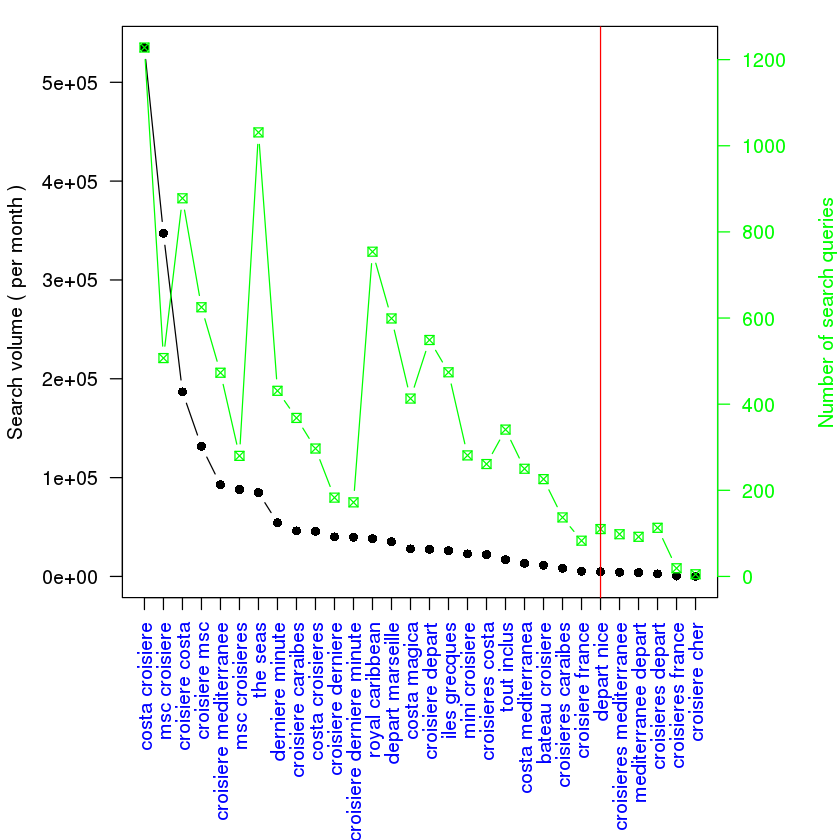

In [18]:
library(text2vec)
library(glmnet)
library(ggplot2)
library(tm)

library(plyr)

# draw potential graph
path_website <- paste(path_out,'/keywords_rank.csv',sep="")


DF_Draw <- read.csv(path_website, sep = ";", encoding = "UTF-8")

# keyword <- strsplit(as.String(DF_Draw$Keyword)," ")
keyword <- DF_Draw$Keyword
totalseo <- DF_Draw$TotalSEO
totalmc <- DF_Draw$TotalMC

## add extra space to right margin of plot within frame
par(mar=c(10, 5, 1, 5) + 0.1)

## Plot first set of data and draw its axis
plot(1:length(keyword), totalseo, pch=16, xlab="", ylab="", 
     axes=FALSE, type="b", ylim=c(0,max(totalseo)), col="black")

# 
axis(2, col="black", ylim=c(min(totalseo),max(totalseo)), las=1)  ## las=1 makes horizontal labels

mtext("Search volume ( per month )",side=2,line=4)
box()

## Allow a second plot on the same graph
par(new=TRUE)

## Plot the second plot and put axis scale on right
plot(1:length(keyword), totalmc, pch=7,  xlab="", ylab="", 
     axes=FALSE, type="b", ylim=c(0,max(totalmc)), col="green")

## a little farther out (line=4) to make room for labels
mtext("Number of search queries",side=4,col="green",line=4) 

axis(4, col="green",col.axis="green",las=1, ylim=c(min(totalmc),max(totalmc)))

## Draw the keyword axis
axis(1, 1:length(keyword), keyword, col.axis = "blue", las=2)

bestKeyword <- tail(which(DF_Draw$TotalSEO>5000),1)

abline(v = (bestKeyword+1), col = 2)
## Add Legend
#legend("topleft",legend=c("Nb de MC","Volume de recherche"),
#       text.col=c("black","red"),pch=c(16,15),col=c("black","red"))

